In [30]:
import config as c
import numpy as np
import matplotlib.pyplot as plt
from simulation import solve_simulation
from opt_initial_values import inital_values
from opt_diags_gen import diags_gen_backwards_euler

In [31]:
Us = []
n_sim = 40+1
center = -45 * c.milli
sides = 40 * c.milli
v_values = np.linspace(center - sides, center + sides ,n_sim)

print("v_values",v_values)

for v_appl in v_values:
    inital_distr = inital_values(v_appl)
    Us.append(solve_simulation(inital_distr,diags_gen_backwards_euler))

v_values [-0.085 -0.083 -0.081 -0.079 -0.077 -0.075 -0.073 -0.071 -0.069 -0.067
 -0.065 -0.063 -0.061 -0.059 -0.057 -0.055 -0.053 -0.051 -0.049 -0.047
 -0.045 -0.043 -0.041 -0.039 -0.037 -0.035 -0.033 -0.031 -0.029 -0.027
 -0.025 -0.023 -0.021 -0.019 -0.017 -0.015 -0.013 -0.011 -0.009 -0.007
 -0.005]


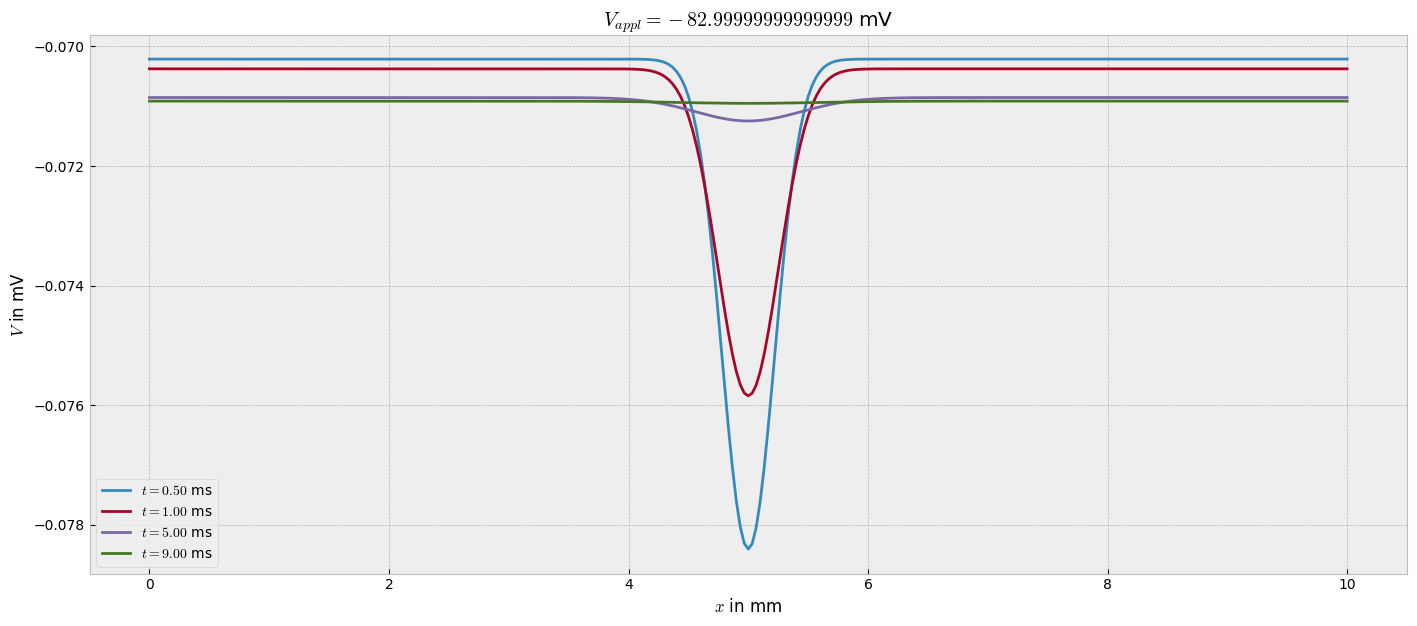

In [35]:
# plot different times
i_v_appl = 1
U = Us[i_v_appl]
      
ts = np.arange(10)*10
ts = [50,100,500,900]

plt.figure(figsize=(17,7))
for t in ts:
    plt.plot(c.x_g/c.milli,U[t],label=f"$t={t*c.delta_t/c.milli:.2f}$ ms")

plt.title("$V_{appl}" + f" = {v_values[i_v_appl]/c.milli}$ mV")
plt.ylabel("$V$ in mV")
plt.xlabel("$x$ in mm")
plt.legend()
plt.show()

0.00999


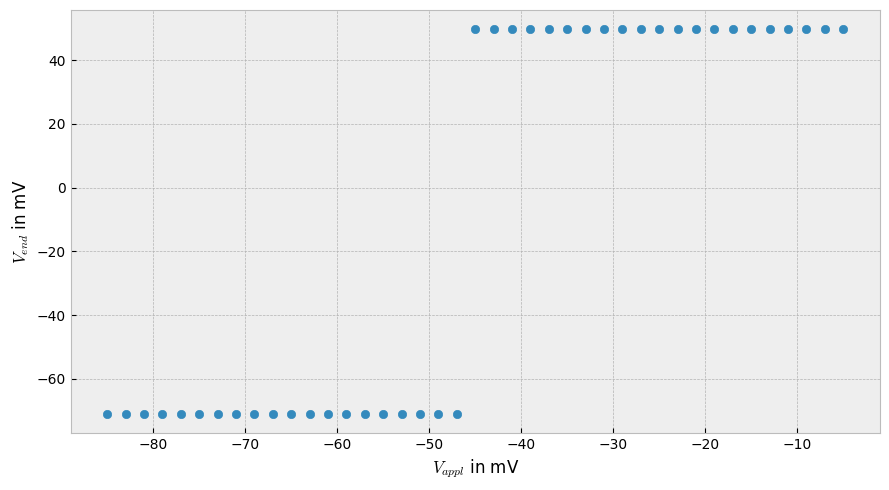

In [33]:
# plot endvoltage against v_appl
# volatage in the middle at the end
endvoltages = []
i_t = c.n_t-1
print(i_t*c.delta_t)
for U in Us:

    endvoltages += [U[i_t,int(c.x_0)]]

plt.style.use('bmh')
plt.figure(figsize=(9,5))
plt.scatter(v_values/c.milli,np.array(endvoltages)/c.milli)
plt.ylabel("$V_{end}$ in mV")
plt.xlabel("$V_{appl}$ in mV")
#plt.axvline(c.v_mem,label="$V_{mem}$",alpha=0.5)
plt.tight_layout()
#plt.legend()
plt.show()

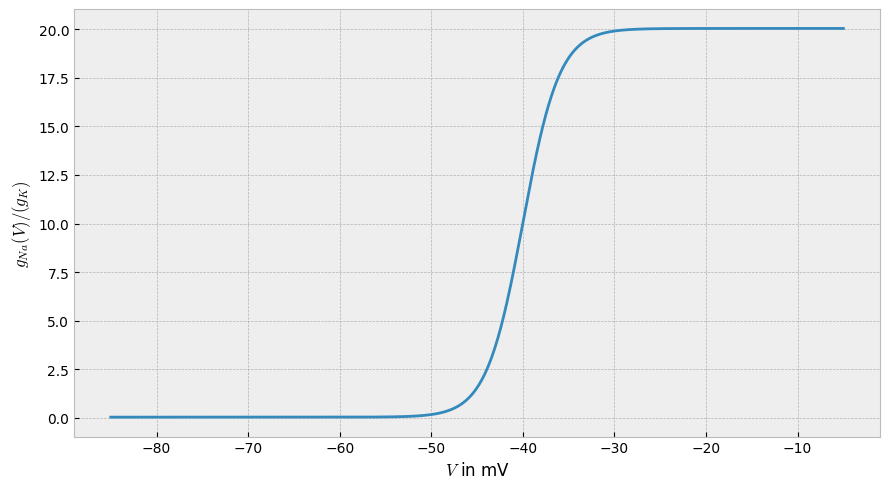

In [34]:
def g_na_g_k(v_vec):
    return ((100/(1 + np.exp(c.gamma*(c.v_star - v_vec)))) + 1/5)/c.g_k

x = np.linspace(center - sides, center + sides ,1000)
#x = np.linspace(-1e3,1e4,1000)

plt.style.use('bmh')
plt.figure(figsize=(9,5))
plt.plot(x/c.milli,g_na_g_k(x))
plt.ylabel("$g_{Na}(V)/(g_K)$")
plt.xlabel("$V$ in mV")
plt.tight_layout()
plt.show()
